# Data Science Project
Individual Planning Report by Simon San

## 1) Data Description
The Pacific Laboratory for Artificial Intelligence (PLAI) have collected data to better investigate how people play video games, with interest in recruitment of players and resource use.


### players.csv
This data set includes information about each player.
It consists of the following seven variables:

- `experience` - categorized level of experience of player
- `subscribe` - whether the player is subscribed to a game-related newspaper
- `hashedEmail` - hashed email of players (to protect privacy)
- `played_hours` - total amount of server play time (in hours)
- `name` - name of player
- `gender` - gender of player
- `Age` - age of player

In [28]:
library(tidyverse)
players <- read_csv(file = "data/players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The dataset has a total of 196 observations. The variables `experience`, `hashedEmail`, `name`, and `gender` are all character vectors. The variables `played_hours`, and `Age` are numeric vectors. The variable `subscribe` is a logical vector.

Below are relevant summary statistics for the different variables:

In [70]:
total_obs <- nrow(players)
subscribed <- players |>
    group_by(subscribe) |>
    summarize(count = n()) |>
    filter(subscribe == TRUE) |>
    mutate(pct_true = count/total_obs) |>
    select(pct_true) |>
    pull()
percentage_subscribed <- round(subscribed*100, 2)
percentage_subcribed_display <- paste0(percentage_subscribed, "%")
print("Percentage of subscribed players:")
percentage_subcribed_display
print("Percentage of non-subscribed players:")
percentage_non_subscribe_display <- paste0(100-percentage_subscribed, "%")
percentage_non_subscribe_display

print("Summary statistics of hours played:")
sum_played_hours <- summary(players$played_hours, na.rm = TRUE)
sum_played_hours_display <- format(round(sum_played_hours, 2))
sum_played_hours_display

print("Summary statistics of age:")
sum_Age <- summary(players$Age, na.rm = TRUE)
sum_Age_display <- format(round(sum_Age, 2))
sum_Age_display

print("Percentage of different experience levels of players:")
fct_exp <- players |>
    mutate(experience = as.factor(experience)) |>
    group_by(experience) |>
    summarize(percentage_experience = n()/total_obs*100) |>
    mutate(percentage_experience = round(percentage_experience, 2)) |>
    arrange(desc(percentage_experience))
fct_exp

print("Percentage of different gender identifying players:")
fct_gender <- players |>
    mutate(gender = as.factor(gender)) |>
    group_by(gender) |>
    summarize(percentage_gender = n()/total_obs*100) |>
    mutate(percentage_gender = round(percentage_gender, 2)) |>
    arrange(desc(percentage_gender))
fct_gender

[1] "Percentage of subscribed players:"


[1] "73.47%"

[1] "Percentage of non-subscribed players:"


[1] "26.53%"

[1] "Summary statistics of hours played:"


Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
"  0.00" "  0.00" "  0.10" "  5.85" "  0.60" "223.10"

[1] "Summary statistics of age:"


Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
" 9.00" "17.00" "19.00" "21.14" "22.75" "58.00"     "2"

[1] "Percentage of different experience levels of players:"


experience,percentage_experience
<fct>,<dbl>
Amateur,32.14
Veteran,24.49
Regular,18.37
Beginner,17.86
Pro,7.14


[1] "Percentage of different gender identifying players:"


gender,percentage_gender
<fct>,<dbl>
Male,63.27
Female,18.88
Non-binary,7.65
Prefer not to say,5.61
Two-Spirited,3.06
Agender,1.02
Other,0.51


## sessions.csv
This data set includes information about every play session. It consists of the following 5 variables:

- `hashedEmail` - hashed email of player (same as in `players.csv`, to identify player)
- `start_time` - start time of player session (dd/mm/yyyy hh/mm)
- `end_time` - end time of player session (dd/mm/yyyy hh/mm)
- `original_start_time`
- `original_end_time`

In [74]:
sessions <- read_csv(file = "data/sessions.csv")

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The dataset has a total of 1535 observations. The variables `hashedEmail`, `start_time`, and `end_time` are all character vectors. The variables `original_start_time`, and `original_end_time` are numeric vectors.

This dataset seems to present some issues:
1. It is unclear how `original_start_time` and `original_end_time` are measured, and it doesn't seem to provide relevance to time of day.
2. `original_start_time` and `original_end_time` may not be sufficient in calculating relevant values like play time, due to its high value (e.g. observation # 1: can calculate a difference between start time and end time using `start_time` and `end_time`, not `original_start_time` and `original_end_time`)

In [75]:
obs_1 <- sessions |>
    select(-hashedEmail) |>
    slice(1)
obs_1

start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<dbl>,<dbl>
30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12


3. The data is untidy; `start_time` and `end_time` have observations which include month, day, year, hour, and minutes.

## 2) Questions
The broad question I will address is *which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts*. Specifically, I will investigate whether age, being subscribed to a game-related newsletter, identifying as a specific gender, and having varying levels of experience predict how much play time a player will produce.

## 3) Exploratory Data Analysis and Visualization
`players.csv` and `sessions.csv` datasets:

In [76]:
players
sessions

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


Means for `played_hours` and `Age`:

In [86]:
mean_played_hours <- format(round(mean(players$played_hours, na.rm = TRUE), 2))
mean_Age <- format(round(mean(players$Age, na.rm = TRUE), 2))
means <- data.frame(
    Category = c("played_hours", "Age"),
    Mean = c(mean_played_hours, mean_Age))
means

Category,Mean
<chr>,<chr>
played_hours,5.85
Age,21.14


Visualizations:

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


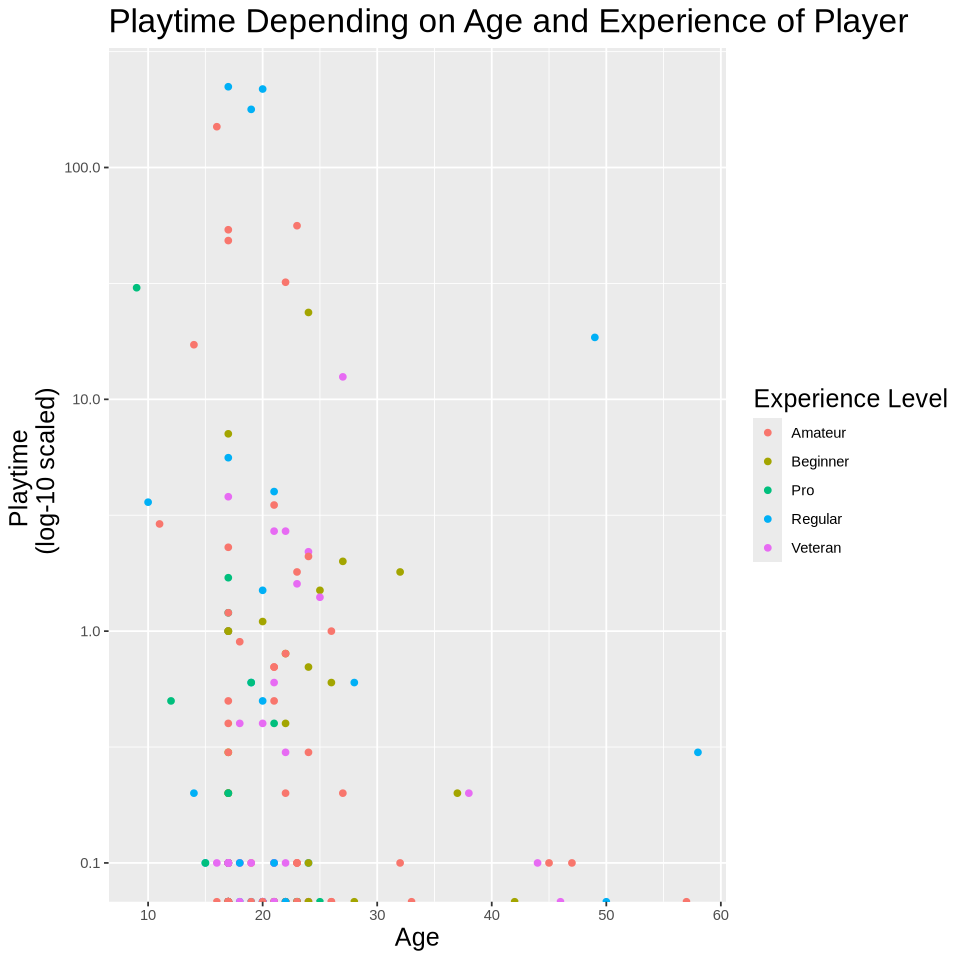

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


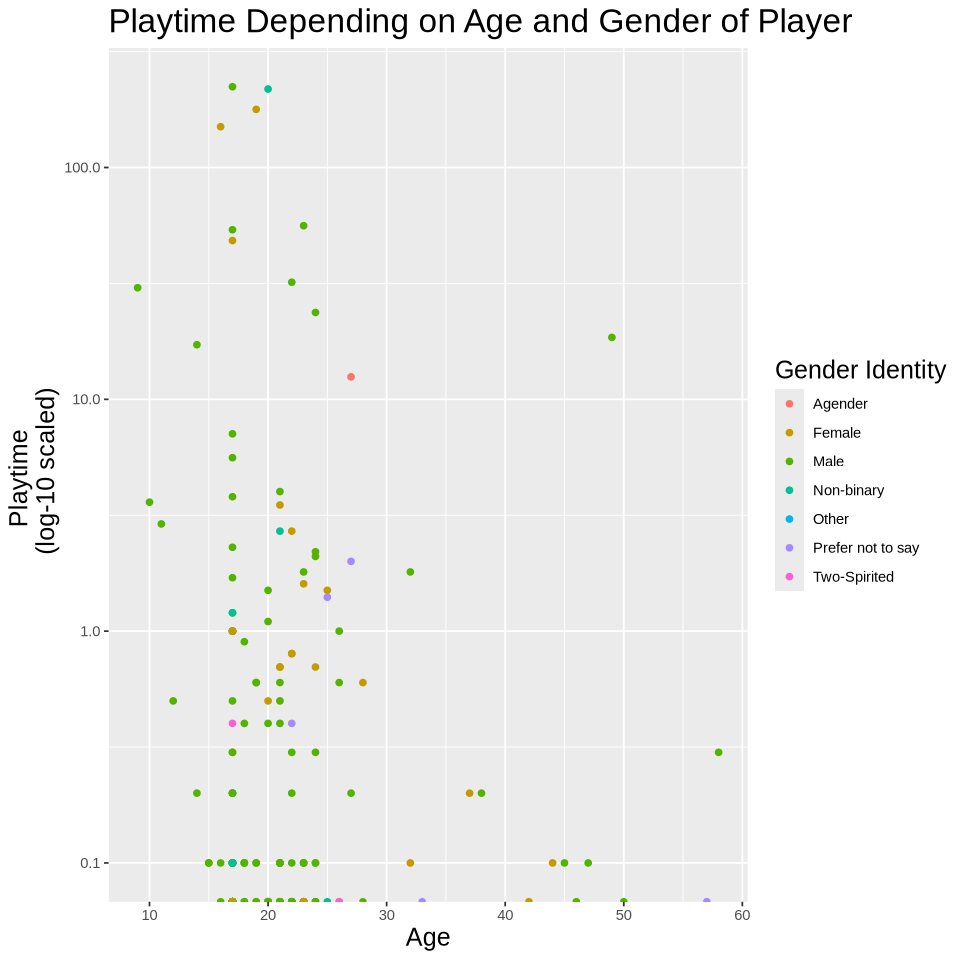

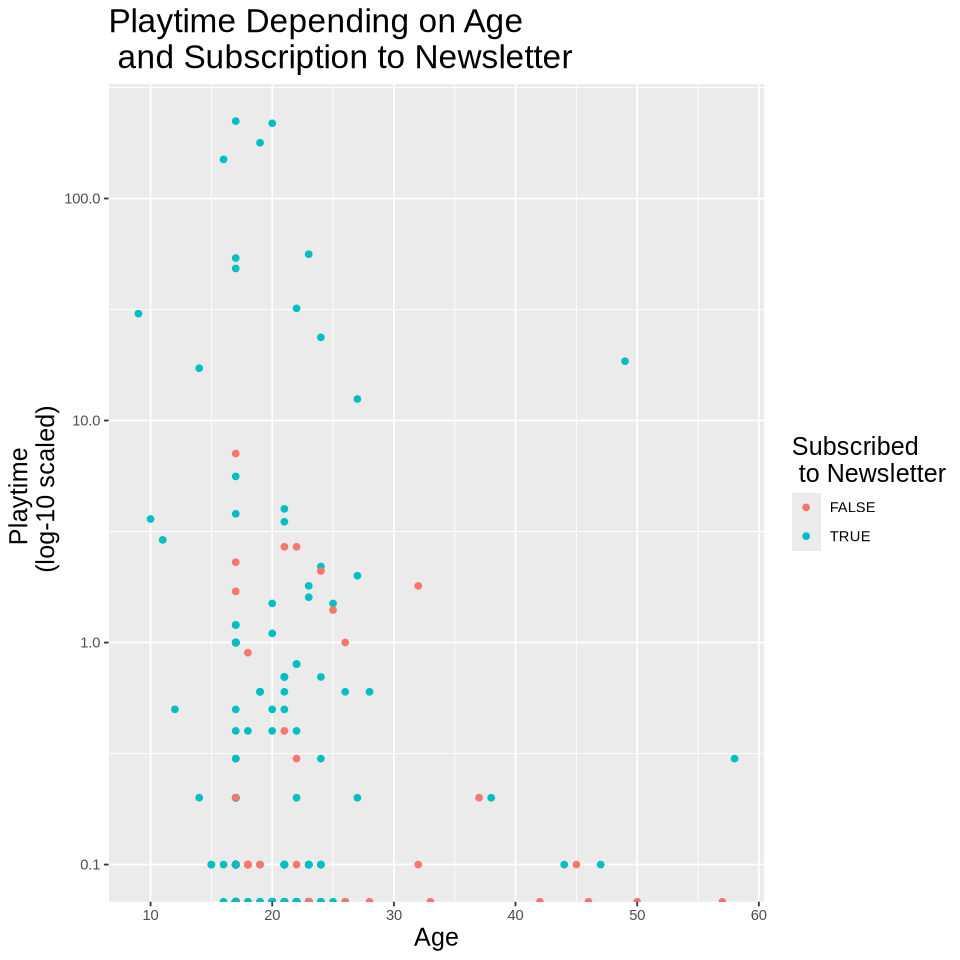

In [122]:
factored_players <- players |>
    mutate(experience = as.factor(experience)) |>
    mutate(gender = as.factor(gender))

options(repr.plot.width = 8, repr.plot.height = 8)

age_and_experience <- factored_players |>
    ggplot(aes(x = Age, y = played_hours, color = experience)) +
    geom_point() +
    scale_y_log10() +
    labs(title = "Playtime Depending on Age and Experience of Player", 
         x = "Age", 
         y = "Playtime \n (log-10 scaled)", 
         color = "Experience Level") +
    theme(plot.title = element_text(size = 20),
         axis.title = element_text(size = 15),
         legend.title = element_text(size = 15))
age_and_experience

age_and_gender <- factored_players |>
    ggplot(aes(x = Age, y = played_hours, color = gender)) +
    geom_point() +
    scale_y_log10() +
    labs(title = "Playtime Depending on Age and Gender of Player", 
         x = "Age", 
         y = "Playtime \n (log-10 scaled)", 
         color = "Gender Identity") +
    theme(plot.title = element_text(size = 20),
         axis.title = element_text(size = 15),
         legend.title = element_text(size = 15))
age_and_gender

age_and_subscribe <- factored_players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    scale_y_log10() +
    labs(title = "Playtime Depending on Age \n and Subscription to Newsletter", 
         x = "Age", 
         y = "Playtime \n (log-10 scaled)", 
         color = "Subscribed \n to Newsletter") +
    theme(plot.title = element_text(size = 20),
         axis.title = element_text(size = 15),
         legend.title = element_text(size = 15))
age_and_subscribe

It general it seems clear that players who are male, and are around age 20 tend to sign up more for this server. However, there does not seem to be a relationship between age, or experience, or gender, or subscription status, with playtime. For example, we can observe that males around 20 are able to have both a lot of playtime, and zero playtime.

## 4) Methods and Plan
I propose to use k-nn regression since we are predicting numeric values (playtime). I am assuming that higher playtime is indicative to producing more data, hence addressing the broad question. This method may be limited in extrapolation since the data itself is limited, but since I noticed that most players were around 20, I assumed the relation (if any) would not be linear.

To find the best k-value, I would split the data into 70% training and 30% testing set, and cross validate it 5 times. Also, to use gender, experience, and subscription status as predictors, we would need to convert them to a numeric value that could represent their classifications.